PCA is a method that rotates the dataset in such a way that the rotated features are statistically uncorrelated. This rotation is followed by selecting only a subset of the new features, according to how important they are for explaining the data.

The algorithm proceeds with finding the direction of maximum variance i.e. Component 1. This is the direction in the data that contains the maximum information or in other words the direction along which the features are more correlated with each other

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cancer=load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
cancer.data.shape

(569, 30)

In [6]:
print(cancer.target_names)

['malignant' 'benign']


In [7]:
np.bincount(cancer.target)
#out of 569 instances 212 is malignant and 357 is benign

array([212, 357], dtype=int64)

Text(0.5,0.98,'cancer_histograms')

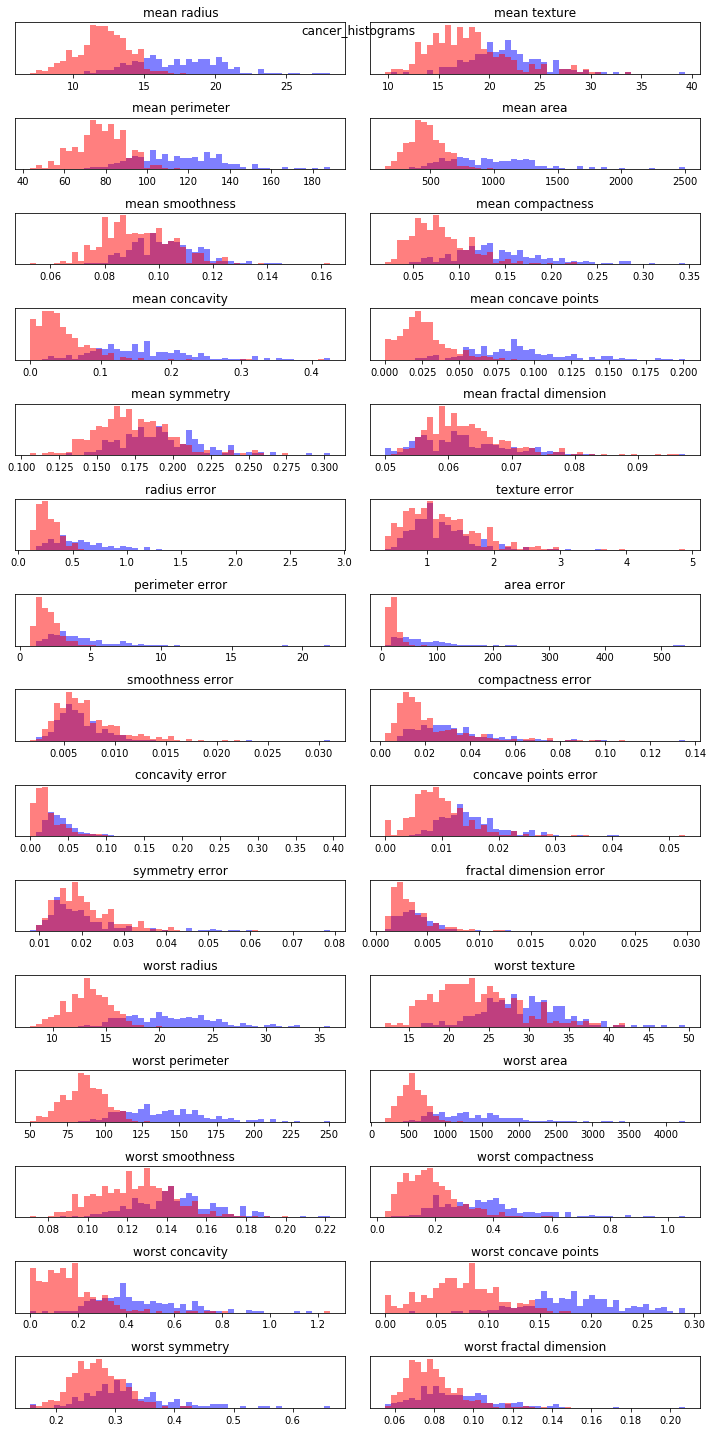

In [11]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='b', alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color='r', alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
fig.tight_layout()
plt.suptitle("cancer_histograms")

Here we create a histogram for each of the features, counting how often a data point
appears with a feature in a certain range (called a bin).

Each plot overlays two histograms, one for all of the points of the benign class (blue)
and one for all the points in the malignant class (red). This gives us some idea of how
each feature is distributed across the two classes, and allows us to venture a guess as
to which features are better at distinguishing malignant and benign samples. For
example, the feature “smoothness error” seems quite uninformative, because the two
histograms mostly overlap, while the feature “worst concave points” seems quite
informative, because the histograms are quite disjoint.

However, this plot doesn’t show us anything about the, which indicate variables that
are varying together . We can find the first two principal components, and visualize
the data in this new, two-dimensional space, with a single scatter-plot.
Before we apply PCA, we scale our data so that each feature has unit variance using
StandardScaler:

In [13]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [16]:
scaler.fit(cancer.data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
x_scaled=scaler.transform(cancer.data)

By default, PCA only rotates (and shifts) the data, but keeps all principal components.
To reduce the dimensionality of the data, we need to specify how many components
we want to keep when creating the PCA object

In [19]:
from sklearn.decomposition import PCA
#keep first two principal components of the data
pca=PCA(n_components=2)
#Fit the PCA model to breast cancer dataset
pca.fit(x_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
#transform the data into first two principal components
x_pca=pca.transform(x_scaled)
print("Original Shape: %s" %str(x_scaled.shape))
print("Reduced Shape: %s" %str(x_pca.shape))

Original Shape: (569, 30)
Reduced Shape: (569, 2)


Text(0,0.5,'Second Principal Component')

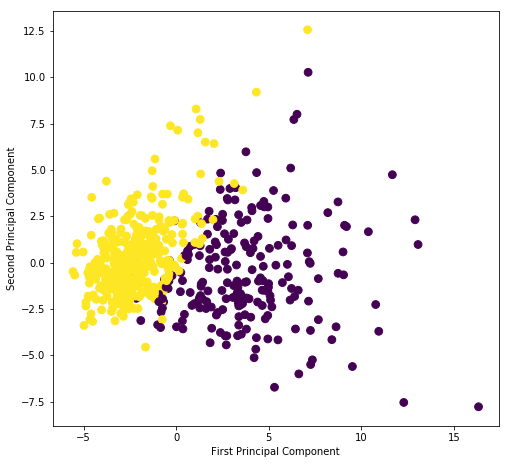

In [23]:
#we can now plot the first two principal components
#plot first vs second principal component color by class
plt.figure(figsize=(8,8))
plt.scatter(x_pca[:,0], x_pca[:, 1], c=cancer.target, s=60)
plt.gca().set_aspect("equal")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

It is important to note is that PCA is an unsupervised method, and does not use any
class information when finding the rotation. It simply looks at the correlations in the
data. For the scatter plot above, we plotted the first principal component against the
second principal component, and then used the class information to color the points.

You can see that the two classes separate quite well in this two-dimensional space.
This can lead us to believe that even a linear classifier (that would learn a line in this
space) could do a reasonably good job at distinguishing the two classes. We can also
see that the malignant (red) points are more spread-out than the benign (blue)
points, something that we could already see a bit from the histograms in Figure cancer_
histograms.

In [24]:
pca.components_.shape

(2, 30)

In [25]:
print(pca.components_)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0.5,0.98,'pca_components_cancer')

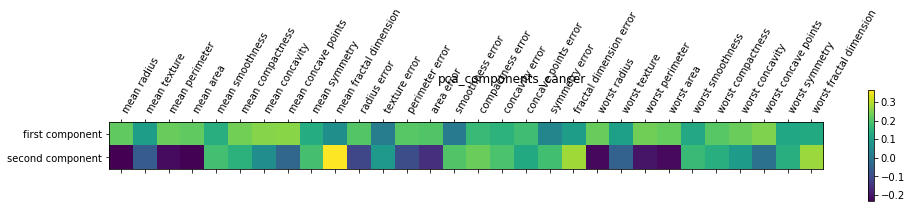

In [26]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["first component", "second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left');
plt.suptitle("pca_components_cancer")

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. 
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.


In [27]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

In [35]:

# You can add the parameter data_home to wherever to where you want to download your data# You c 
mnist = pd.read_csv("C:\\Users\\Sharique Ahmed\\Desktop\\DataSets\\MNIST\\mnist_test.csv\\mnist_test.csv", header=None)

In [36]:
mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
mnist.shape #the last column is the targer variable

(10000, 785)

In [42]:
X=mnist.loc[:, :783]

In [43]:
X.shape

(10000, 784)

In [49]:
y=mnist.loc[:, 784:785]

In [50]:
y.shape

(10000, 1)

# Splitting Data into Train and Test Split

In [51]:
train_img, test_img, train_lbl, test_lbl=train_test_split(X, y, test_size=1/7, random_state=0)

In [53]:
print(train_img.shape)

(8571, 784)


In [54]:
print(train_lbl.shape)

(8571, 1)


In [55]:
print(test_img.shape)

(1429, 784)


In [56]:
print(test_lbl.shape)

(1429, 1)


In [59]:
print(train_img[0].head())

3989    0
2154    1
6987    6
4443    3
6859    4
Name: 0, dtype: int64


# Find Number of Principal Components with 95% of Explained Variance

Train PCA by requesting the projection preserve 95% of the variance. Common to choose number of principal components such that a percentage of the variance is retained (in this case 95%)

In [60]:
pca = PCA(.95)

In [61]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [62]:
pca.n_components_
#95% of the variance amounts to 148 principal components

148

The idea with going from 784 components to 154 is to reduce the running time of a supervised learning algorithm (in this case logistic regression) which we will see at the end of the tutorial. One of the cool things about PCA is that we can go from a compressed representation (154 components) back to an approximation of our original high dimensional data (784 components).

In [63]:
components = pca.transform(train_img)
approximation = pca.inverse_transform(components) #reversing this to original data

# Showing Graph for Explained Variance vs Number of Principal Components



In [68]:
pca=PCA()

In [69]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [70]:
pca.n_components_

784

In [71]:
# Summing explained variance
tot = sum(pca.explained_variance_)
tot

3435726.8092318829

In [72]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[9.9772875699177366, 7.5675557768013766, 6.1774070511091885, 5.4331859864462571, 5.0321616486925009]


In [73]:
# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

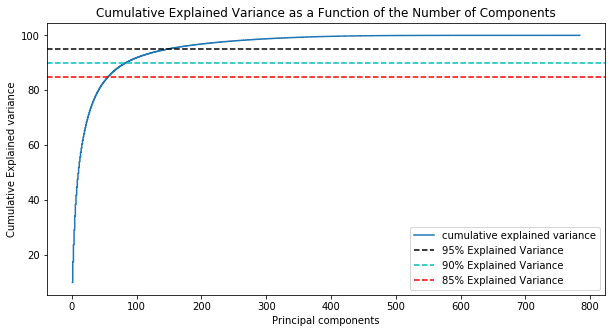

In [74]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.step(range(1, 785), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

# Number of Principal Components for 99%, 95%, 90%, and 85% of Explained Variance

In [75]:
# Indices corresponding to the first occurrence are returned with the np.argmax function
# Adding 1 to the end of value in list as principal components start from 1 and indexes start from 0 (np.argmax)
componentsVariance = [784, np.argmax(cum_var_exp > 99) + 1, np.argmax(cum_var_exp > 95) + 1, np.argmax(cum_var_exp > 90) + 1, np.argmax(cum_var_exp >= 85) + 1]

In [76]:
componentsVariance

[784, 322, 148, 84, 57]

# PCA to Speed up Machine Learning Algorithms (Logistic Regression)

Mention how long it takes for me to run classification with 99, 95, 90, 85 (maybe make a table). Go that PCA is not necessary in every data science workflow


Mention how long it takes for me to run classification with 99, 95, 90, 85 (maybe make a table). Go that PCA is not necessary in every data science workflow

Need to put the steps for applying PCA for machine learning applications

Fit PCA on training set. Note: we are fitting PCA on the training set only

Apply the mapping (transform) to both the training set and the test set.

Train your machine learning algorithm (in this case logistic regression) on the transformed training set

Test your machine learning algorithm on the transformed test set.

# Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
train_img_pca=pca.transform(train_img)

Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (digits) and y (labels)

In [86]:
train_lbl.describe()

,784
count,8571.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


# PCA + Logistic Regression